Data set taken from here: https://www.kaggle.com/moltean/fruits

# Preperations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

Set up the GPUs if we can use them.

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

Import our training and test images

In [3]:
IMAGE_SIZE = (100, 100)

training_images = tf.keras.preprocessing.image_dataset_from_directory(
   "fruits-360/Training",
   image_size=IMAGE_SIZE
)

test_images = tf.keras.preprocessing.image_dataset_from_directory(
   "fruits-360/Test",
   image_size=IMAGE_SIZE
)

NUM_CLASSES = len(training_images.class_names)

Found 67692 files belonging to 131 classes.
Found 22688 files belonging to 131 classes.


Show some images from the loaded data set

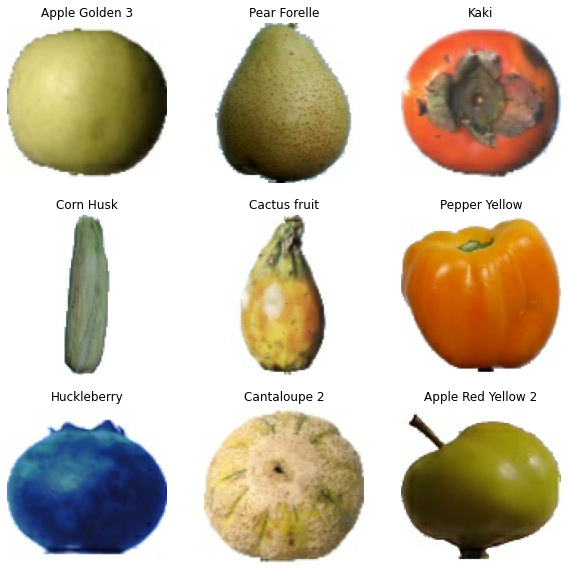

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in training_images.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(training_images.class_names[labels[i]])
        plt.axis("off")

# Neural Network

Create a basic CNN

In [5]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=IMAGE_SIZE + (3,)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

Then train the model with the training images.

In [6]:
EPOCHS = 3

history = model.fit(training_images, validation_data=test_images, epochs=EPOCHS)
model.save('fruits.h5')

Epoch 1/5
2116/2116 [==============================] - 38s 18ms/step - loss: 0.4836 - accuracy: 0.8780 - val_loss: 0.4290 - val_accuracy: 0.9057
Epoch 2/5
2116/2116 [==============================] - 38s 18ms/step - loss: 0.0509 - accuracy: 0.9852 - val_loss: 0.2920 - val_accuracy: 0.9428
Epoch 3/5
2116/2116 [==============================] - 38s 18ms/step - loss: 0.0321 - accuracy: 0.9910 - val_loss: 0.3023 - val_accuracy: 0.9254
Epoch 4/5
2116/2116 [==============================] - 38s 18ms/step - loss: 0.0261 - accuracy: 0.9924 - val_loss: 0.3125 - val_accuracy: 0.9359
Epoch 5/5
2116/2116 [==============================] - 38s 18ms/step - loss: 0.0163 - accuracy: 0.9955 - val_loss: 0.4309 - val_accuracy: 0.9075


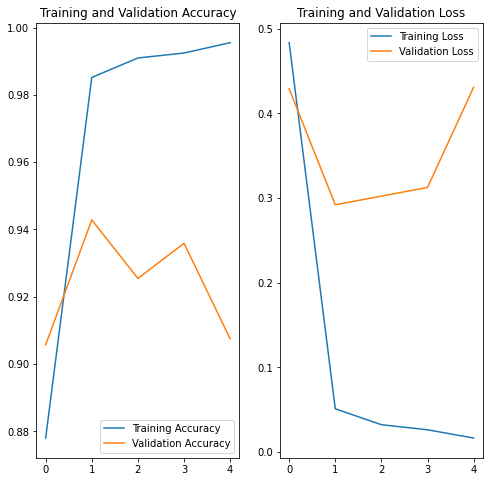

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
img = tf.keras.preprocessing.image.load_img("fruits-360/mangostan.jpg", target_size=IMAGE_SIZE)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

guesses = {}

for i, score in enumerate(score):
    guesses[training_images.class_names[i]] = score

for fruit, score in {k: v for k, v in sorted(guesses.items(), key=lambda item: item[1], reverse=True)}.items():
    print("{}: {:.2f}%".format(fruit, score * 100))


Mulberry: 83.47%
Pear Abate: 11.62%
Banana Red: 1.81%
Banana Lady Finger: 1.36%
Redcurrant: 0.74%
Eggplant: 0.68%
Physalis with Husk: 0.24%
Cucumber Ripe: 0.04%
Tomato not Ripened: 0.02%
Corn Husk: 0.00%
Corn: 0.00%
Pear 2: 0.00%
Banana: 0.00%
Pineapple Mini: 0.00%
Ginger Root: 0.00%
Cherry Rainier: 0.00%
Apple Golden 2: 0.00%
Cauliflower: 0.00%
Nut Pecan: 0.00%
Tomato 2: 0.00%
Cactus fruit: 0.00%
Onion Red: 0.00%
Dates: 0.00%
Pear Red: 0.00%
Onion Red Peeled: 0.00%
Raspberry: 0.00%
Pineapple: 0.00%
Pear Stone: 0.00%
Kaki: 0.00%
Lychee: 0.00%
Pitahaya Red: 0.00%
Cantaloupe 2: 0.00%
Granadilla: 0.00%
Apple Red Delicious: 0.00%
Salak: 0.00%
Strawberry: 0.00%
Nectarine: 0.00%
Cherry Wax Yellow: 0.00%
Physalis: 0.00%
Onion White: 0.00%
Quince: 0.00%
Apple Golden 3: 0.00%
Mango Red: 0.00%
Beetroot: 0.00%
Apple Red Yellow 1: 0.00%
Carambula: 0.00%
Clementine: 0.00%
Tamarillo: 0.00%
Potato Red: 0.00%
Grape White 2: 0.00%
Grape White 3: 0.00%
Lemon Meyer: 0.00%
Peach Flat: 0.00%
Apple Braeburn